In [73]:
import numpy as np
from ast import literal_eval
from pysr import PySRRegressor

#  Load model -- Replace with your own model
model = PySRRegressor.from_file('hall_of_fame_2023-10-01_152854.756.pkl', model_selection='accuracy')
model.latex()

Checking if hall_of_fame_2023-10-01_152854.756.pkl exists...
Loading model from hall_of_fame_2023-10-01_152854.756.pkl


9.67337136096838*(3.0684514 + (1.70553931882124*x1*(x0 + x3)/x2 + x4)/x0)/x1

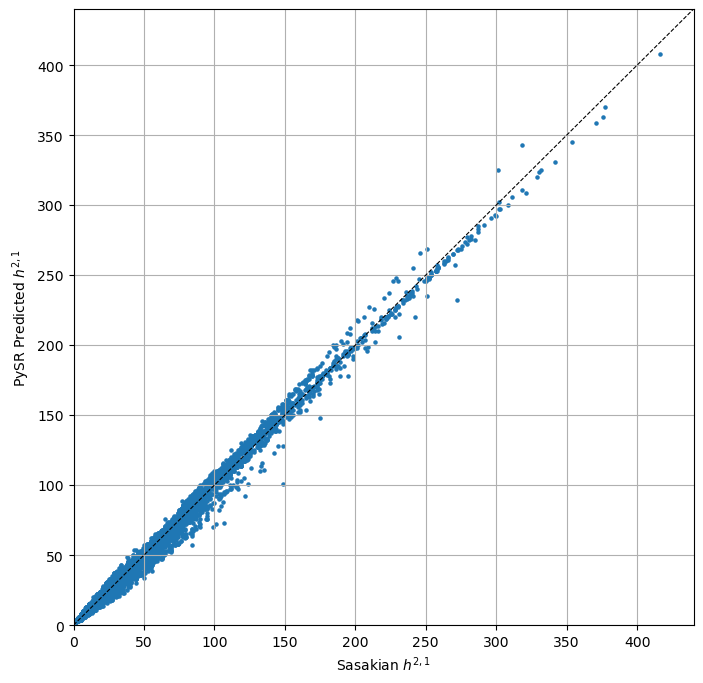

In [74]:
from matplotlib import pyplot as plt

#Import sasakian hodge
Sweights, SHodge = [], []
with open('Data/Topological_Data.txt','r') as file:
    for idx, line in enumerate(file.readlines()[1:]):
        if idx%6 == 0: Sweights.append(eval(line))
        if idx%6 == 2: SHodge.append(eval(line))
Sweights = np.array(Sweights)        
SHodge  = np.array(SHodge)

prediction = np.round(model.predict(Sweights))

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

ax.scatter(SHodge[:,1], prediction, s=5, alpha=1)
ax.plot([0, 450], [0, 450], color = 'black', alpha=1, linewidth = 0.8, linestyle = '--')

ax.set_xlim(0, 440)  # Set the X-axis range from 0 to 6
ax.set_ylim(0, 440)  # Set the Y-axis range from 0 to 6

ax.set_xlabel(r'Sasakian $h^{2,1}$')
ax.set_ylabel(r'PySR Predicted $h^{2,1}$')
plt.grid()
plt.savefig('SymReg_Hodge.pdf')



In [75]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

outputs = SHodge[:,1]
X_train, X_test, y_train, y_test = train_test_split(Sweights, outputs, test_size=0.1, random_state=42)


print("##################################")
print("R2:", r2_score(np.round(model.predict(Sweights)), SHodge[:,1]))
print("MAE:", mean_absolute_error(np.round(model.predict(Sweights)), SHodge[:,1]))
print("##################################")

##################################
R2: 0.9927700889100389
MAE: 2.910451715459001
##################################
